#### Implementation of a Neural Network based Multi-Class Classification Module using gradient descent optimization

Some Notes:

1. The aim of a neural network is to learn the relationship between inputs and outputs.
2. Learning in AI/ML context vaguely means optimizing the parameters of the weights and biases matrices. The objective of the optimization is to minimize a cost function.
3. A cost function can be understood as a measure of the performance of an algorithm.
4. The learning happens over a number of epochs. 
5. Ideally, the value of the cost functions must "move" towards the global minima with each epoch.

Steps involved in training a model:
1. Perform one step of prediction. (Forward Propagation)
2. Compare the prediction to the ground truth and obtain a value for cost function.
3. Compute gradients of the cost function with respect to intermediate tuanable variables. (Backward Propagation)
4. Update the parameters using the gradient descent method.

For a simple one layer neural network:

reference : https://becominghuman.ai/understanding-neural-networks-2-the-math-of-neural-networks-in-3-equations-6085fd3f09df
 **Forward Propagation**:
 
     1. regression : Z = W * X + b
     2. applying activation : A = G(z) where G is the activation function. e.g. ReLu, Linear, Sigmoid, SoftMax etc.
     3. Compute cost : sum over losses for all examples. Example of a loss function : cross-entropy
 **Backward Propagation**:
 
     1. Compute derivatives of the cost function function wrt W, b
     2. Update W, b using the derivatives
 
 **Reiterate**
 
NOTE : This is a simple Batch Gradient Descent Neural Network

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy 
import pandas as pd
from tensorflow.keras.datasets import mnist

In [2]:
class Classifier(object):
    
    def __init__(self, train_x, train_y, test_x, test_y, n_classes):
        # get the training and the testing dataset
        # n_classes is the number of the prediction classes
        self.train_x = train_x
        self.train_y = train_y
        self.test_x  = test_x
        self.test_y  = test_y
        self.m, self.n = self.train_x.shape #no of examples, number of features
        self.c       = n_classes
        self.losses = []
        self.epochs  = 1000
        self.learning_rate = 0.9
        self.init_const = 0.01 # a small multiplier for initialising weights.
        
    # softmax = exp(x_i)/(sum_i(exp(x_i)))   
    # softmax can be used for multi-class classfication
    # the result is a measure of probability for each class
    # the class with highest value is considered as a prediction
    def softmax(self, z):
        
        numerator = np.exp(z)
        denominator = np.sum(np.exp(z),axis = 1)
        for i,den in enumerate(denominator):
            numerator[i]/=den
        return numerator # [0.001, 0.05, 0.4,.,.,.]
    
    def initialise(self):
        #initialize the W and b matrices with random numbers
        # multiply with a small number to get matrices initialised with very small numbers
        
        self.W = np.random.random((self.n, self.c))*self.init_const
        self.b = np.random.random(self.c)*self.init_const
    
    def one_hot(self, y,c ):
        #one hot encode the labels
        y_h = np.zeros((len(y), c))
        y_h[np.arange(len(y)), y] = 1
        return y_h
    
    def train(self):
        X = self.train_x
        y = self.train_y
        self.initialise()
        # z = m * x + c
        # function(z) -> (0, 1)
        for epoch in range(self.epochs):
            #perform a linear regression step: Forward Propagation Step 1
            z = X@self.W + self.b
            
            #apply a softmax activation :  Forward Propagation Step 2
            y_pred = self.softmax(z)
            
            #one hot encode the ground truth values to n_classes
            y_h = self.one_hot(y, self.c)
            
            # compute the loss
            # Calculating loss and appending it in the list.
            # this is a cross-entropy loss function
            # Forward Propagation : Step 3
            loss = -np.mean(np.log(y_pred[np.arange(len(y)), y]))
            self.losses.append(loss)
            
            #calculate the gradient and take average over the examples : Backward Propagation Step 1
            grad_W = np.dot(X.T, (y_pred - y_h))/self.m
            b_grad = np.sum(y_pred - y_h)/self.m

            #move the parameters towards steepest descent : Backward Propagation Step 2
            self.W = self.W - self.learning_rate * grad_W 
            self.b = self.b - self.learning_rate * b_grad

            
            # Printing out the loss at every 100th iteration.
            # Calculate the accuracy by predicting over the test dataset
            if epoch%100==0:
                test_preds = self.predict(self.test_x)
                accuracy = self.accuracy(self.test_y, test_preds)
                print(f'Epoch {epoch} ==> Loss = {loss} & Test Accuracy {accuracy}')
            
    def predict(self,X):
        z = X@self.W + self.b
        y_pred = self.softmax(z)
        return np.argmax(y_pred, axis = 1)
    
    def accuracy(self,y, y_pred):
        return np.sum(y == y_pred)/len(y)


In [3]:
# Let's prepare a commonly available dataset for training the neural network.

In [4]:
(X_train, y_train), (X_test, Y_test) = mnist.load_data()

Text(0.5, 1.0, 'Label 7')

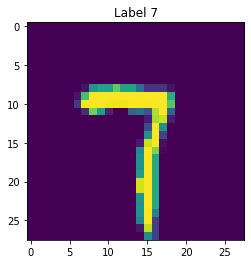

In [9]:
# display a random image from training dataset
choice = np.random.choice(range(len(X_train)))
plt.imshow(X_train[choice])
plt.title(f"Label {y_train[choice]}")

In [10]:
# What is the shape of the Image?
X_train[0].shape, y_train.shape # #convert y_train from (dim,) to (dim,1)

((28, 28), (60000,))

In [11]:
# since the data is image, the maximum value is 255 and min is 0, 
# It can be min-max scaled by dividing with 255
X_train = X_train/255.
X_test  = X_test/255.

In [12]:
# Flattening the dataset into a single list i.e. (28,28) into a (28 *28) 
X_train = np.reshape(X_train, (len(X_train), (28*28)))

In [13]:
X_test = np.reshape(X_test, (len(X_test), (28*28)))

In [14]:
# target variables have to be reshaped into a one-hot encoding
print (f"Unique classes : {np.unique(y_train)}")

Unique classes : [0 1 2 3 4 5 6 7 8 9]


In [16]:
# create one hot encoding representation of the dataset
def one_hot( y,c ):
    #one hot encode the labels
    y_h = np.zeros((len(y), c))
    y_h[np.arange(len(y)), y] = 1
    return y_h
train_y_hot = one_hot(y_train,10)

In [17]:
train_y_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [19]:
# begin training classifier
classifier = Classifier(X_train, y_train, X_test, Y_test, 10)

In [20]:
# the module is not properly vectorized and hence takes longer to train for 1000 epochs
classifier.train()

Epoch 0 ==> Loss = 2.2983411165930767 & Test Accuracy 0.6733
Epoch 100 ==> Loss = 0.3561642192804543 & Test Accuracy 0.9075
Epoch 200 ==> Loss = 0.32386245480246934 & Test Accuracy 0.9146
Epoch 300 ==> Loss = 0.30920682846000225 & Test Accuracy 0.9176
Epoch 400 ==> Loss = 0.3003040600600606 & Test Accuracy 0.9185
Epoch 500 ==> Loss = 0.2941042730911499 & Test Accuracy 0.9192
Epoch 600 ==> Loss = 0.28942750183079735 & Test Accuracy 0.9203
Epoch 700 ==> Loss = 0.2857112450007892 & Test Accuracy 0.9206
Epoch 800 ==> Loss = 0.2826493722485482 & Test Accuracy 0.9207
Epoch 900 ==> Loss = 0.2800589827573881 & Test Accuracy 0.9217


In [ ]:
# Getting a test accuracy of 92.17% using a simple neural network is a quite good result.
# In follow up notebook, we will explore the ways to improve this score and also try the same model on some other datasets


Text(0, 0.5, 'Loss')

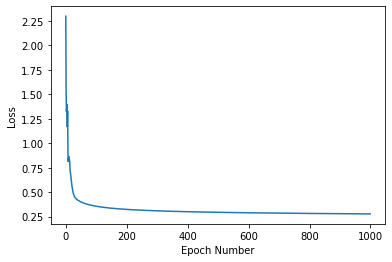

In [31]:
# lets look at the plot of loss
plt.figure()
plt.plot(classifier.losses)
plt.xlabel("Epoch Number")
plt.ylabel("Loss")


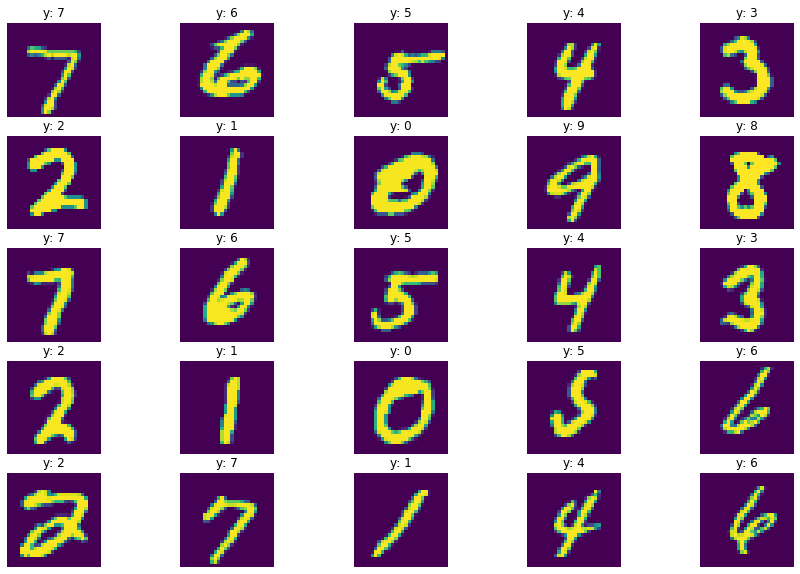

In [20]:
# let's do some quick 
fig = plt.figure(figsize=(15,10))
for i in range(25):  
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(X_test[-i].reshape(28,28))
    
    ax.set_title('y: {y}'.format(y=Y_test[-i], y_hat=test_preds))
    plt.axis('off')

In [32]:
#### ERROR Analysis

In [33]:
# Lets look at examples which went wrong and try to understand what happened.

In [36]:
# let's do some quick  error analysis
test_predictions = classifier.predict(classifier.test_x)
actual_values    = classifier.test_y
test_predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [40]:
wrong_prediction_index = []
for i in range(len(test_predictions)):
    if test_predictions[i] != actual_values[i]:
        wrong_prediction_index.append(i)

In [42]:
wrong_prediction_index[:10]

[8, 33, 63, 66, 92, 124, 149, 193, 195, 211]

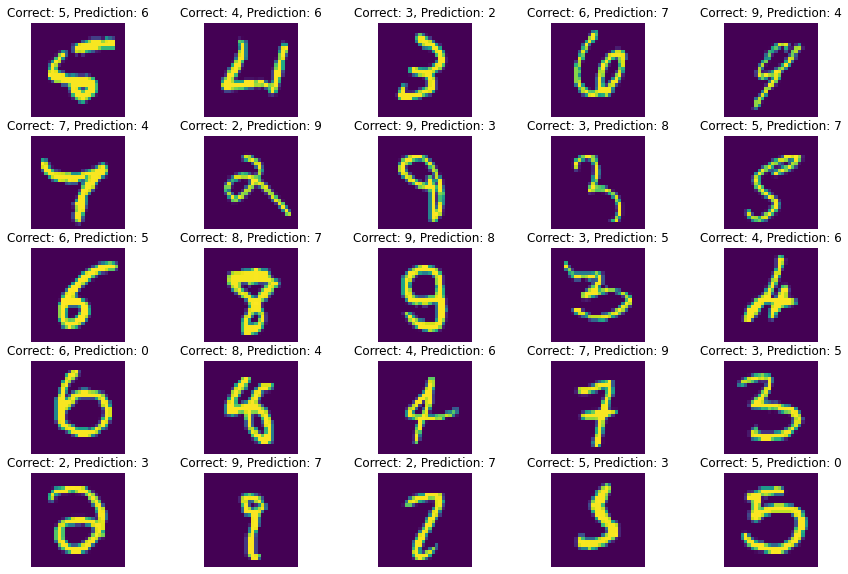

In [44]:
fig = plt.figure(figsize=(15,10))
for i in range(25):  
    ax = fig.add_subplot(5, 5, i+1)
    index = wrong_prediction_index[i]
    ax.imshow(classifier.test_x[index].reshape(28,28))
    correct_label = actual_values[index]
    prediction    = test_predictions[index]
    ax.set_title(f'Correct: {correct_label}, Prediction: {prediction}')
    plt.axis('off')

In [46]:
# From the above error analysis, it can be seen that although the model does fairly well if the digit is written nicely,
#it's failing when the curvature used is a little confusing.
# In the followup notebook, we will improve upon the model by making a deeper neural network.
# First we will begin with a two layer neural network and then generalise to N-layered neural network